In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.5 MB 9.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.5 MB 7.1 MB/s eta 0:00:02
   -------------- ------------------------- 4.2/11.5 MB 6.6 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.5 MB 6.0 MB/s eta 0:00:02
   --------------------- ------------------ 6.3/11.5 MB 5.8 MB/s eta 0:00:01
   ------------------------- -------------- 7.3/11.5 MB 5.7 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 5.6 MB/s eta 0:00:01
   -------------------------------- ------- 9.4/11.5 MB 5.6 MB/s eta 0:00:01
   ------------------------------------- -- 10.7/11.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   --- ---

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Matplotlib is building the font cache; this may take a moment.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

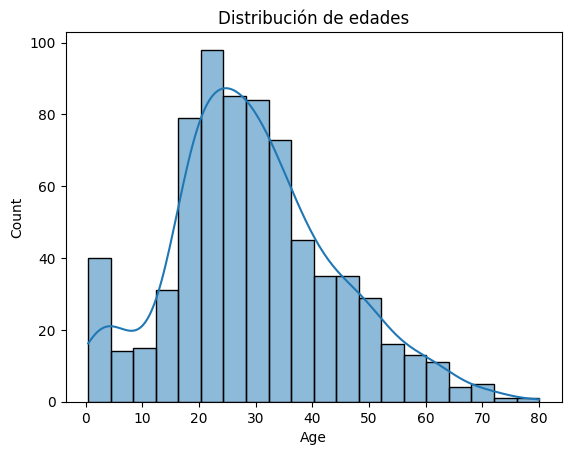

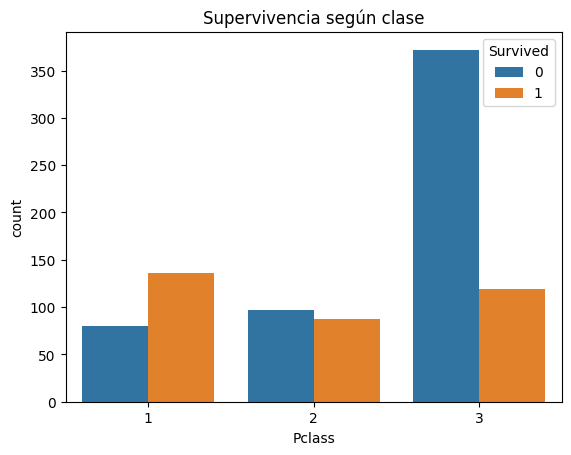

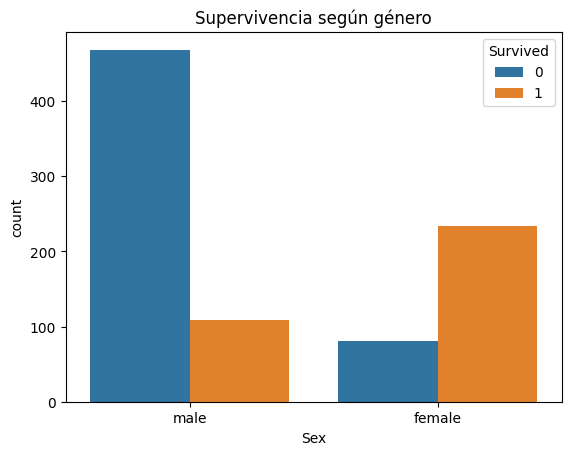

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
titanic_data = pd.read_csv("Titanic-Dataset.csv")

# Inspección inicial de datos
print(titanic_data.info())
print(titanic_data.describe())

# Análisis de distribuciones
sns.histplot(titanic_data['Age'].dropna(), kde=True)
plt.title('Distribución de edades')
plt.show()

# Relación entre supervivencia y clase
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')
plt.title('Supervivencia según clase')
plt.show()

# Relación entre género y supervivencia
sns.countplot(data=titanic_data, x='Sex', hue='Survived')
plt.title('Supervivencia según género')
plt.show()


In [4]:
# Limpieza: Eliminar filas con valores faltantes en columnas relevantes
cleaned_data = titanic_data.dropna(subset=['Age', 'Embarked'])

# Transformar variables categóricas en numéricas
cleaned_data['Sex'] = cleaned_data['Sex'].map({'male': 0, 'female': 1})
cleaned_data['Embarked'] = cleaned_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Comprobar los datos después del preprocesamiento
print(cleaned_data.info())

# Confirmar que no hay valores nulos restantes
print(cleaned_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     712 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 72.3+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64


C:\Users\FRANKWOKER\AppData\Local\Temp\ipykernel_10860\2176962871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Sex'] = cleaned_data['Sex'].map({'male': 0, 'female': 1})
C:\Users\FRANKWOKER\AppData\Local\Temp\ipykernel_10860\2176962871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Embarked'] = cleaned_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las características más relevantes para predecir la supervivencia
X = cleaned_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]  # Variables predictoras
y = cleaned_data['Survived']  # Variable objetivo

# Aplicar SelectKBest con el test ANOVA para clasificación
selector = SelectKBest(f_classif, k=5)  # Selecciona las 5 mejores características
X_selected = selector.fit_transform(X, y)

# Mostrar las características seleccionadas
selected_columns = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_columns)


Características seleccionadas: Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare'], dtype='object')


In [6]:
from sklearn.model_selection import train_test_split

# Dividir los datos seleccionados en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Ver las dimensiones de los conjuntos de datos
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")


Dimensiones de X_train: (569, 5)
Dimensiones de X_test: (143, 5)


In [7]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar los coeficientes del modelo (importancia de cada característica)
print("Coeficientes del modelo:", model.coef_)


Coeficientes del modelo: [[-1.34126737e+00  2.53591332e+00 -3.19413022e-02 -9.83119856e-02
  -1.62697556e-03]]


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluación con métricas de clasificación
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte completo de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión: 0.8695652173913043
Recall: 0.6349206349206349
F1-Score: 0.7339449541284404
Matriz de confusión:
[[74  6]
 [23 40]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        80
           1       0.87      0.63      0.73        63

    accuracy                           0.80       143
   macro avg       0.82      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



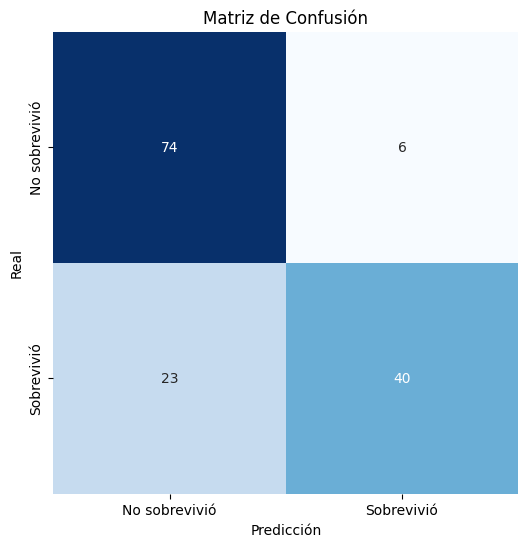

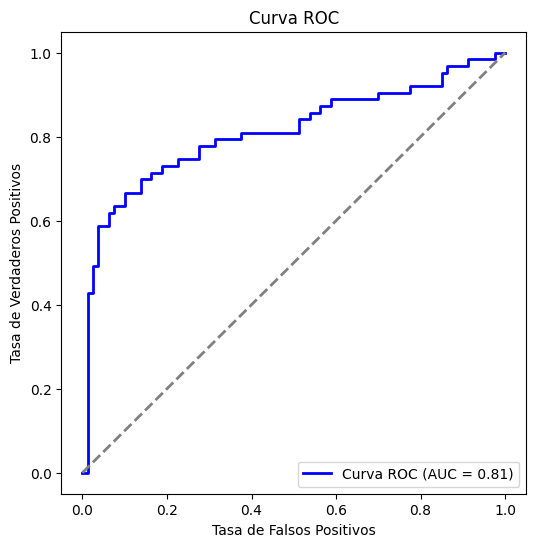

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No sobrevivió', 'Sobrevivió'], 
            yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()


In [10]:
# Interpretación de los resultados
print("\nAnálisis del desempeño del modelo:")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Analizar la matriz de confusión
true_positive = cm[1, 1]  # Sobrevivientes correctamente predichos
false_positive = cm[0, 1]  # No sobrevivientes incorrectamente predichos como sobrevivientes
true_negative = cm[0, 0]  # No sobrevivientes correctamente predichos
false_negative = cm[1, 0]  # Sobrevivientes incorrectamente predichos como no sobrevivientes

# Informe detallado
print("\nInforme detallado:")
print(f"Verdaderos positivos: {true_positive}")
print(f"Falsos positivos: {false_positive}")
print(f"Verdaderos negativos: {true_negative}")
print(f"Falsos negativos: {false_negative}")

# Conclusión
if f1 > 0.75:
    print("\nEl modelo tiene un buen desempeño, con un F1-score superior a 0.75.")
else:
    print("\nEl modelo tiene un desempeño moderado, con un F1-score por debajo de 0.75.")



Análisis del desempeño del modelo:
Precisión: 0.87
Recall: 0.63
F1-Score: 0.73

Informe detallado:
Verdaderos positivos: 40
Falsos positivos: 6
Verdaderos negativos: 74
Falsos negativos: 23

El modelo tiene un desempeño moderado, con un F1-score por debajo de 0.75.
